  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
[1,  1250] loss: 2.235
[1,  2500] loss: 2.142
[1,  3750] loss: 2.086
[1,  5000] loss: 2.031
[1,  6250] loss: 2.003
[1,  7500] loss: 1.966
[1,  8750] loss: 1.934
[1, 10000] loss: 1.914
[1, 11250] loss: 1.892
[1, 12500] loss: 1.868
For Epoc no. =  0
Train accuracy =  36
Test accuracy =  36
[2,  1250] loss: 1.848
[2,  2500] loss: 1.834
[2,  3750] loss: 1.824
[2,  5000] loss: 1.817
[2,  6250] loss: 1.792
[2,  7500] loss: 1.784
[2,  8750] loss: 1.762
[2, 10000] loss: 1.757
[2, 11250] loss: 1.765
[2, 12500] loss: 1.776
For Epoc no. =  1
Train accuracy =  39
Test accuracy =  39
[3,  1250] loss: 1.728
[3,  2500] loss: 1.730
[3,  3750] loss: 1.743
[3,  5000] loss: 1.713
[3,  6250] loss: 1.720
[3,  7500] loss: 1.710
[3,  8750] loss: 1.705
[3, 10000] loss: 1.690
[3, 11250] loss: 1.671
[3, 12500] loss: 1.681
For Epoc no. =  2
Train accuracy =  42
Test accuracy =  41
[4,  1250] loss: 1.668
[4,  2500] loss: 1.67

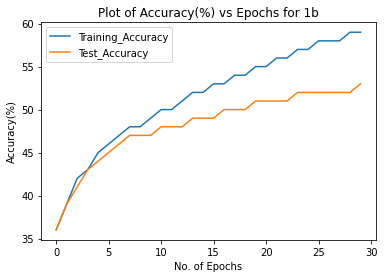

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)



classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

m = np.arange(100,900,100)

#for i in range(len(m)):
#M = m[i]
M = 500
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        #self.conv1 = nn.Conv2d(3, , 32)
        #self.conv2 = nn.Conv2d(1, 4, 32)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(32*32*3, M) 
        self.fc2 = nn.Linear(M,10) 

    def forward(self, x):
        # Max pooling over a (2, 2) window
        #x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        #x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        #x = F.relu(self.conv1(x))
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        # x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(x)
        x = self.fc2(x)
        
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
MoM = 0.85
Eta = 0.0001
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.6) #momentum = 0.7

Training_loss = []
Training_accuracy = []
EEPPOO = []

Test_accuracy = []
Test_error = []
EE = []

############### Function for calculating the accuracy ###############
def accuracy(X):
  correct = 0
  total = 0
  with torch.no_grad():
      for data in X:
          images, labels = data
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  return correct * 100 // total
 ####################################################################


################# Training ##########################################

for epoch in range(30):  # loop over the dataset multiple times

    running_loss = 0.0
    correct = 0
    total = 0
    n = 0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        

        # zero the parameter gradients
        optimizer.zero_grad()
 
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 1250 == 1249:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 1250:.3f}')
            running_loss = 0.0
    train_accuracy = accuracy(trainloader)
    test_accuracy = accuracy(testloader)
    print("For Epoc no. = ",epoch)
    print("Train accuracy = ",train_accuracy)
    print("Test accuracy = ",test_accuracy)
    Training_accuracy.append(train_accuracy)
    Test_accuracy.append(test_accuracy)
    EEPPOO.append(epoch)








# net = Net()
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# loss_per_epoch = []
# for epoch in range(12):  # loop over the dataset multiple times

#     running_loss = 0.0
#     for i, data in enumerate(trainloader, 0):
#         # get the inputs; data is a list of [inputs, labels]
#         inputs, labels = data

#         # zero the parameter gradients
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         outputs = net(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         # print statistics
#         running_loss += loss.item()
        

#         # if i % 2000 == 1999:    # print every 2000 mini-batches
#         #     print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
#         #     running_loss = 0.0
#     loss_per_epoch.append(running_loss)


# since we're not training, we don't need to calculate the gradients for our outputs
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')



# plt.figure()
# plt.plot(EEPPOO,Training_loss,label='Training_Loss')
# #plt.plot(EEPPOO,Test_error,label='Test_loss')
# plt.xlabel("No. of Epochs")
# plt.ylabel("Error")
# plt.legend()


print("Hyper parameters used = ")
print("Momentum = ",MoM)
print("Learning Rate(Eta) = ",Eta)




plt.figure()
plt.plot(EEPPOO,Training_accuracy,label='Training_Accuracy')
plt.plot(EEPPOO,Test_accuracy,label='Test_Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy(%)")
plt.title("Plot of Accuracy(%) vs Epochs for 1b")
plt.legend()
      


# print(list(net.parameters()))




# out = net(x_train)
# print(out)

